In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
propellers = pd.read_csv('data/all_info_test_data.csv')
# propellers.info()

In [9]:
# Number of Propellers per Blade Count
propellers['Blade Count'].value_counts()


3.0     33130
2.0      7622
4.0      3306
6.0      2260
5.0      1782
8.0      1093
10.0      150
12.0       43
7.0        14
9.0         9
1.0         2
Name: Blade Count, dtype: int64

In [30]:
propellers.columns
propellers['Do Not Import'].head(10)

0      b01h
1      b01h
2    c02SDC
3    c02SDC
4    c02SDC
5    c02SDC
6    c02SDC
7    c02SDC
8    c02SDC
9    c02SDC
Name: Do Not Import, dtype: object

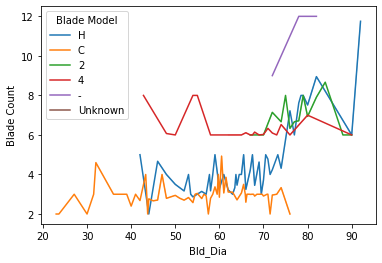

In [14]:
daily = sns.lineplot(x="Bld_Dia", y="Blade Count", hue="Blade Model", data=propellers, ci=0)

### Declare Variables

In [15]:
engine = 'R532'
vehicle = 'Tierra II'
red_ratio = '2.58:1 Gear_Rotax B'

In [16]:
filtered_df = (propellers['Engine_ID'] == 'R532') & (propellers['Vehicle_ID'] == 'Tierra II') & (propellers['Reduction_Ratio (Rename to Red... Drive Name)'] == '2.58:1 Gear_Rotax B')
propellers[filtered_df]

,name,product_id,Old_Serial,New_Serial,Hub_Serial,Status,Do Not Import,Hub Model,Blade Count,Blade Model,...,Update_4,Update_5_Date,Update_5,x_studio_ship_date,OLD_NOTES,Old_BldSpecs,Old_BldNum,Old_BldType,Old_Hub,Unnamed: 50
52,4023M,Legacy Propeller,NaN,NaN,NaN,Active,c02SDC,Standard,2.0,C,...,NaN,NaN,NaN,10/18/1989,TIERRA II PUSHER_R532 GBOX__EXCH (3228M)_,RS,2,I,NaN,NaN
150,C10329,Legacy Propeller,NaN,NaN,NaN,Active,c02SDC,Standard,2.0,C,...,NaN,NaN,NaN,1/21/2000,TIERRA PUSHER_R532 GBOX 2.58:1_ROTAX_MTG HDW...,RS,2,CF,S,NaN
464,C11835,Legacy Propeller,NaN,NaN,NaN,Active,c02SDC,Standard,2.0,C,...,NaN,NaN,NaN,10/9/2001,TIERRA PUSHER_R532 GBOX_ROTAX_MTG HDW_,RS,2,CF,S,NaN
1056,C14596,Legacy Propeller,NaN,NaN,NaN,Active,c02SDC,Standard,2.0,C,...,NaN,NaN,NaN,3/15/2005,TIERRA II PUSHER_R532 GBOX 2.58:1_ROTAX_MTG ...,RS,2,CF,S,NaN
2373,C5111,Legacy Propeller,NaN,NaN,NaN,Active,c02SDC,Standard,2.0,C,...,NaN,NaN,NaN,3/12/1992,TIERRA II PUSHER_R532 GBOX_STD ROTAX__,RSG,2,CF,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18313,C6788,Legacy Propeller,NaN,NaN,NaN,Active,c03SDC,Standard,3.0,C,...,NaN,NaN,NaN,9/8/1994,__ROTAX__,RS,3.0,CF,S,NaN
23443,N13913,Legacy Propeller,NaN,NaN,NaN,Active,c03SDC,Standard,3.0,C,...,NaN,NaN,NaN,11/11/2003,TIERRA PUSHER ON FLOATS_R532 GBOX B 2.58:1_R...,RW,3.0,CF,S,NaN
37172,T5232,Legacy Propeller,NaN,NaN,NaN,Active,c03HLC,HPL,3.0,C,...,NaN,NaN,NaN,9/28/1992,RANS S-14 AIRAILE PUSHER_R582 GBOX 2.58_RTX_...,RT,3,CF,HL,NaN
37675,T6107,Legacy Propeller,NaN,NaN,NaN,Active,c03SDC,Standard,3.0,C,...,NaN,NaN,NaN,7/31/1994,"Rotax, 3-1.5",RT,3,CF,S,NaN


In [19]:
blade_df = propellers.loc[filtered_df, [
    'name', 'Hub Model', 'Blade Count', 'Blade Model', 'Bld_Dia', 'Rotation']]

In [20]:
# Number of propellers per Blade count
blade_df['Blade Count'].value_counts
()


()

In [21]:
# Number of propellers per Blade count
blade_df['Blade Count'].value_counts(normalize=True)

3.0    0.858974
2.0    0.141026
Name: Blade Count, dtype: float64

## 85.89% of propellers with engine ID engine = 'R532', vehicle = 'Tierra II', red_ratio = '2.58:1 Gear_Rotax B' have 2 Blades

In [23]:
grp = propellers.groupby(['Vehicle_ID'])

In [25]:
# Total Engine ID grouped by Vehicle ID
grp['Engine_ID'].value_counts(ascending=False, normalize=True).head(50)

Vehicle_ID                  Engine_ID              
5151 Mustang                R582                       0.670732
                            un-Geo                     0.085366
                            un-Suzuki                  0.085366
                            R532                       0.036585
                            R618                       0.024390
                            2SI 690 L70                0.012195
                            AMW                        0.012195
                            Harley Davidson            0.012195
                            R503                       0.012195
                            R583                       0.012195
                            R912A/F/UL (80HP)          0.012195
                            Simonini Victor 2          0.012195
                            un-Auto                    0.012195
A20 Vista                   R912S/ULS/ULSFR (100HP)    0.600000
                            R582                    

In [26]:
# look at filter by specific vehicle ID
grp['Engine_ID'].value_counts(ascending=False).loc['un-Gyro']

Engine_ID
R503                       188
Subaru EA81                187
R582                       129
R532                        78
R912S/ULS/ULSFR (100HP)     43
                          ... 
un-Chevrolet                 1
un-Diesel                    1
un-Rotary                    1
un-Turbine                   1
un-Yamaha                    1
Name: Engine_ID, Length: 67, dtype: int64